In [19]:
import numpy as np
import pandas as pd 
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
goog_data = pd.read_csv('GOOG.csv', index_col='Date', parse_dates=True)

In [21]:
time_period = 20 #Number of days over which to avg
history = [] #History of prices
sma_values = [] #Simple moving avg values
close = goog_data['Close']

In [22]:
for close_price in close:
    history.append(close_price)
    if len(history) > time_period: #Remove the oldest price
        del(history[0])
    sma_values.append(stats.mean(history))
 

In [23]:
goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(Simple20MovingAvg=pd.Series(sma_values,index=goog_data.index))
close_price = goog_data['ClosePrice']
sma = goog_data['Simple20MovingAvg']

<AxesSubplot:xlabel='Date', ylabel='Google Price in $'>

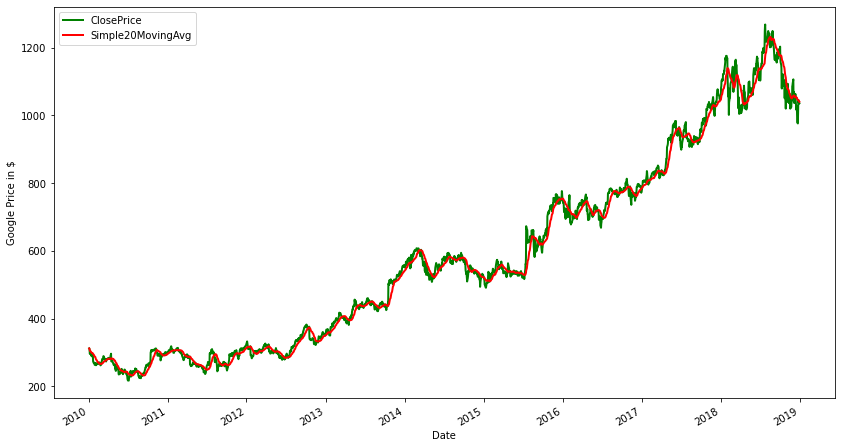

In [24]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111, ylabel='Google Price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
sma.plot(ax=ax1, color='r', lw=2., legend=True)